### 5.3 Gradient Descent

* Y=4X+6

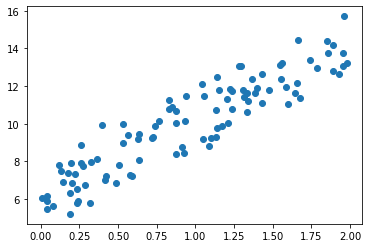

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = 2 * np.random.rand(100,1) 
y = 6+4*X+np.random.randn(100,1)

plt.scatter(X,y)

In [7]:
X.shape, y.shape

((100, 1), (100, 1))

In [14]:
# w1 w0 updating 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    #initialization
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    #prediction and error calculation
    y_pred = np.dot(X, w1.T) +w0
    diff = y-y_pred
    #dummy
    w0_factors = np.ones((N,1))
    #w1_update, w0_update
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [17]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [18]:
def gradient_descent_steps(X, y, iters=10000):
    #initialization 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [19]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


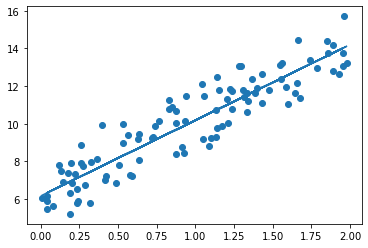

In [20]:
plt.scatter(X,y)
plt.plot(X,y_pred)

* Stochastic gradient descent

In [30]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost=100000
    iter_index=0
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [32]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


### 5.4 Scikit-learn LinearRegression(Boston housing price)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
#data load
boston = load_boston()
#DataFrame
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
print('Boston DF shape:', bostonDF.shape)
bostonDF.head()

Boston DF shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [53]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


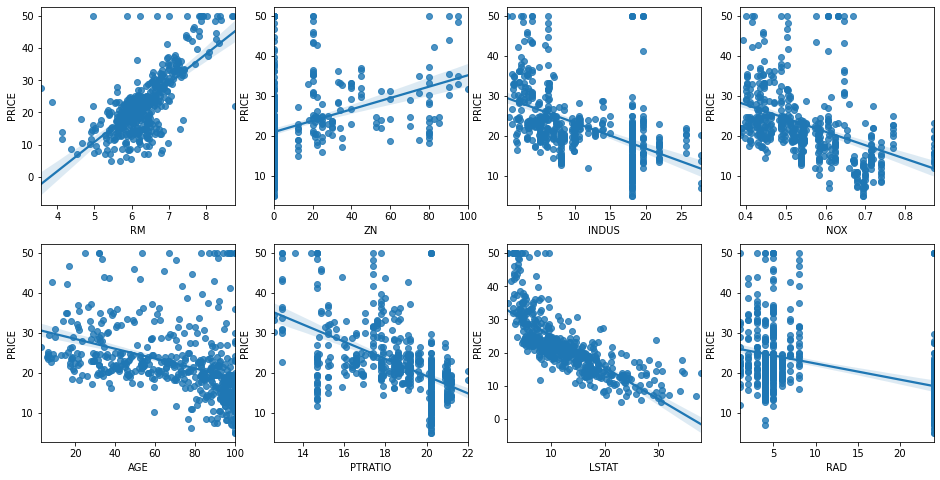

In [41]:
fig, axs = plt.subplots(figsize=(16,8), nrows=2, ncols=4)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

- Training, test data split and training/prediction/evaluation

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)
# Linear Regression Ordinary Least Square method
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [51]:
print('Intercept:', lr.intercept_)
print('Regression Coeff.', np.round(lr.coef_,2))

Intercept: 40.995595172164336
Regression Coeff. [-1.10e-01  7.00e-02  3.00e-02  3.05e+00 -1.98e+01  3.35e+00  1.00e-02
 -1.74e+00  3.60e-01 -1.00e-02 -9.20e-01  1.00e-02 -5.70e-01]


In [52]:
coeff = pd.Series(data = np.round(lr.coef_,2), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

* Evaluation using cross_val_score

In [58]:
from sklearn.model_selection import cross_val_score
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE', axis=1)
lr = LinearRegression()
# neg_mse_scores : negative value because the larger the evaluation score is, the better performance the scikitlearn evaluate 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds each negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds each RMSE scores:', np.round(rmse_scores,2))
print('5 folds average RMSE scores:', np.round(avg_rmse, 2))


5 folds each negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds each RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds average RMSE scores: 5.83


### 5-5. Polynomial Regression, understanding overfitting and underfitting

#### Polynomial Regression

##### PolynomialFeatures class

In [154]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('first-order polynomial feature:\n',X)

# second order polynomial transform
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('transformed:\n', poly_ftr)

first-order polynomial feature:
 [[0 1]
 [2 3]]
transformed:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [153]:
# third-order
def polynomial_func(X):
    y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    print(X[:,0])
    print(X[:,1])
    return y

X = np.arange(0,4).reshape(2,2)
print('First-order feature:\n', X)
y = polynomial_func(X)
print('Third-order feature:\n', y)

First-order feature:
 [[0 1]
 [2 3]]
[0 2]
[1 3]
Third-order feature:
 [  5 125]


In [155]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('Third-order feature:\n', poly_ftr)

# Linear Regression using third-order feature
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial Regression Weight:\n', np.round(model.coef_,2))
print('Polynomial Regression Weight shape:\n', model.coef_.shape)

Third-order feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial Regression Weight:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial Regression Weight shape:
 (10,)


Target coeff :
[1,2,0,3,0,0,0,0,0,4]

In [75]:
poly_ftr @ model.coef_

array([  3.24324324, 123.24324324])

* Neater way - Using pipeline

In [81]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X): # for target value generation
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial regression weights\n', np.round(model.named_steps['linear'].coef_,2))


Polynomial regression weights
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


- Polynomical regression for boston housing prediction (pipeline)

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np

# boston data loading
boston = load_boston()
# to DataFrame
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
# target data
bostonDF['PRICE'] = boston.target
print('Dataset size:', bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)
## PolynomialFeatures transform, LinearRegression Pipeline
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                    ('linear', LinearRegression())])
p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse, rmse))
print('Variance Score:{0:.3f}'.format(r2_score(y_test, y_preds)))

Dataset size: (506, 14)
MSE:15.556, RMSE:3.944
Variance Score:0.782


In [160]:
X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

### Underfitting and Overfitting
https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

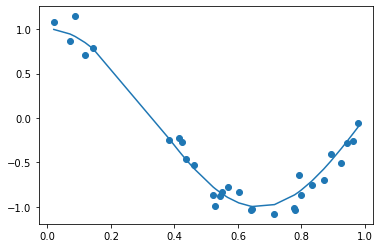

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Return cosine value
def true_fun(X):
    return np.cos(1.5*np.pi*X)

# X random sampling
np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X)+np.random.randn(n_samples)*0.1
plt.plot(X,true_fun(X))
plt.scatter(X,y)


 Degree 1 regression coefficient : [-1.61]
Degree 1 MSE : 0.40772896250986834

 Degree 4 regression coefficient : [  0.47 -17.79  23.59  -7.26]
Degree 4 MSE : 0.04320874987231747

 Degree 15 regression coefficient : [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08]
Degree 15 MSE : 182815433.47648773


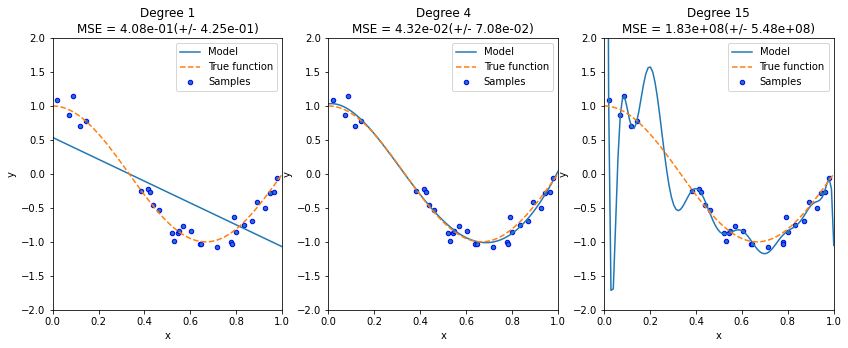

In [136]:
# first order, 4th-order, 15th-order polynomial regression
plt.figure(figsize=(14,5))
degrees = [1, 4, 15]
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
#     plt.setp(ax, xticks=(), yticks=())
    #polynomial trasformation
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)
    
    # cross_validation
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    # acquire coefficiant
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\n Degree {0} regression coefficient : {1}'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} MSE : {1}'.format(degrees[i], -1*np.mean(scores)))
    
    # 100 test data set ranging from 0 to 1
    X_test = np.linspace(0, 1, 100)
    # prediction curve
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label='Model')
    # true curve
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    
    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

### 5-6 Regularized Linear Models - Ridge, Lasso
-Ridge

In [165]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#data load
boston = load_boston()
#boston dataset to dataframe
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
#Target
bostonDF['PRICE'] = boston.target
print('Boston data set size:', bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE', axis=1)

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds each negative MSE scores:', np.round(neg_mse_scores,3))
print('5 folds each RMSE scores:', np.round(rmse_scores,3))
print('5 folds average RMSE:{0:.3f}'.format(avg_rmse))

Boston data set size: (506, 14)
5 folds each negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds each RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds average RMSE:5.518


- Ridge's alpha value sweep

In [167]:
# Ridge alpha values
alphas = [0, 0.1, 1, 10, 100]
# alphas list iteration
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    #cross_val_score
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha={0}, 5 folds mean RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha=0, 5 folds mean RMSE: 5.829
alpha=0.1, 5 folds mean RMSE: 5.788
alpha=1, 5 folds mean RMSE: 5.653
alpha=10, 5 folds mean RMSE: 5.518
alpha=100, 5 folds mean RMSE: 5.330


- Coefficient change depending on alpha

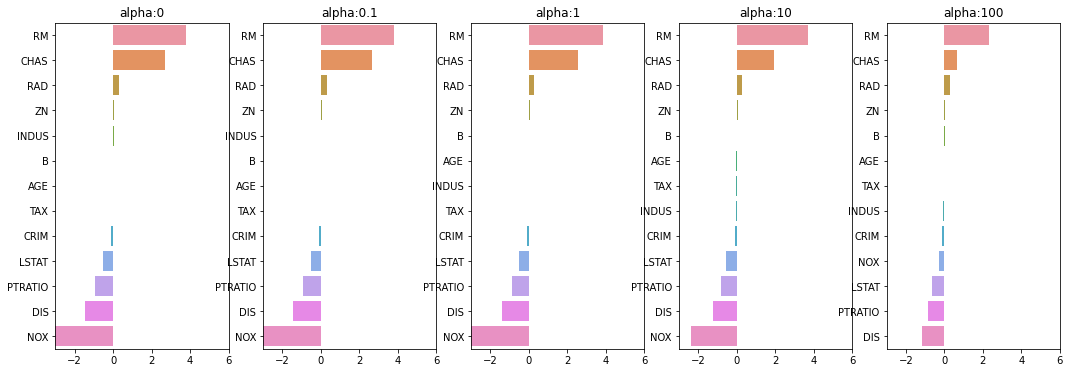

In [169]:
# row=1, col=5 subplots
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# new dataframe
coeff_df = pd.DataFrame()
# alphas list iteration
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    # acheiving coefficients
    coeff = pd.Series(ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname]=coeff
    # bar plot
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

In [174]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


- Lasso Regression

In [181]:
from sklearn.linear_model import Lasso, ElasticNet
# function that take regularization model, and calculate mean RMSE and corresponding coefficients
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose: print('####',model_name,'####')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha:{0}, 5 folds average RMSE:{1:.3f}'.format(param, avg_rmse))
        # cross_val_score only returns score. To acheive coefficient, retraining is needed
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # coefficient array to Series and add it to dataframe
            coeff = pd.Series(model.coef_, index=X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname]=coeff
    return coeff_df

In [179]:
# call get_linear_reg_eval for Lasso
lasso_alphas=[0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#### Lasso ####
alpha:0.07, 5 folds average RMSE:5.612
alpha:0.1, 5 folds average RMSE:5.615
alpha:0.5, 5 folds average RMSE:5.669
alpha:1, 5 folds average RMSE:5.776
alpha:3, 5 folds average RMSE:6.189


In [180]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [182]:
# elastic net alpha = a+b in the equation: a*L1+b*L2
# l1_ratio = a/(a+b) = 0.7 in this particular case
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target )

#### ElasticNet ####
alpha:0.07, 5 folds average RMSE:5.542
alpha:0.1, 5 folds average RMSE:5.526
alpha:0.5, 5 folds average RMSE:5.467
alpha:1, 5 folds average RMSE:5.597
alpha:3, 5 folds average RMSE:6.068


In [183]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


### Data Transformation for linear regression model

In [189]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
# method: Standard, MinMax, Log
# p_degree: polynomial feature degree
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [192]:
# Ridge alpha
alphas = [0.1, 1, 10, 100]
scale_methods=[(None, None), ('Standard', None), ('Standard', 2),
               ('MinMax', None), ('MinMax', 2), ('Log', None), ('Log', 2)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n transform type:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)

 transform type:None, Polynomial Degree:None
alpha:0.1, 5 folds average RMSE:5.788
alpha:1, 5 folds average RMSE:5.653
alpha:10, 5 folds average RMSE:5.518
alpha:100, 5 folds average RMSE:5.330
(506, 13) (506, 13)

 transform type:Standard, Polynomial Degree:None
alpha:0.1, 5 folds average RMSE:5.826
alpha:1, 5 folds average RMSE:5.803
alpha:10, 5 folds average RMSE:5.637
alpha:100, 5 folds average RMSE:5.421
(506, 104) (506, 13)

 transform type:Standard, Polynomial Degree:2
alpha:0.1, 5 folds average RMSE:8.827
alpha:1, 5 folds average RMSE:6.871
alpha:10, 5 folds average RMSE:5.485
alpha:100, 5 folds average RMSE:4.634
(506, 13) (506, 13)

 transform type:MinMax, Polynomial Degree:None
alpha:0.1, 5 folds average RMSE:5.764
alpha:1, 5 folds average RMSE:5.465
alpha:10, 5 folds average RMSE:5.754
alpha:100, 5 folds average RMSE:7.635
(506, 104) (506, 13)

 transform type:MinMax, Polynomial Degree:2
alpha:0.1, 5 folds average RMSE:5.298
alpha:1, 5 folds average RMS